In [1]:
import pandas as pd
from utils import *
CONDITION = 1

In [2]:
df = load_data()
filtered_df = df[df['condition'] == CONDITION]
cols = ["familiar_with_diabetes", "age"]
user_summary(filtered_df, cols)

# Categorize by groups
# df = df[df['familiar_with_diabetes'] < 3]

familiar_with_diabetes:
Min: 1; Max: 6
Mean: 3.6666666666666665
Median: 4.0
Standard Deviation: 1.7489492643904123

age:
Min: 24; Max: 63
Mean: 38.333333333333336
Median: 37.5
Standard Deviation: 9.99411591593656



In [3]:
# participants info

filtered_df = df[df['condition'] == CONDITION]
cols = ["gender", "education", "familiar_with_diabetes", "age"]

num_columns = len(cols)
num_rows = (num_columns + 1) // 2
fig = make_subplots(rows=num_rows, cols=2, vertical_spacing=0.25, subplot_titles=cols)

for i, column in enumerate(cols):
    counts = filtered_df[column].value_counts().sort_index()
    x_values = counts.index
    y_values = counts.values
    
    row = i // 2 + 1
    col = i % 2 + 1
    
    fig.add_trace(
        go.Bar(x=x_values, y=y_values, name=column),
        row=row, col=col,
    )
    fig.update_xaxes(
        tickvals=x_values,
        ticktext=[str(val) for val in x_values],
        row=row, col=col,
        tickangle=25,
        tickmode='array'
    )


fig.update_layout(
    height=300 * num_rows,
    showlegend=False
)

fig.show()

{'step 1 acc': [15, 14, 13, 13, 14, 15, 13, 15, 15, 10, 19, 12, 11, 13, 14, 14, 11, 13], 'step 2 acc': [15, 15, 12, 13, 14, 12, 12, 14, 14, 10, 19, 12, 13, 11, 13, 14, 10, 13], 'step 3 acc': [15, 15, 15, 13, 13, 14, 13, 13, 14, 12, 16, 14, 14, 13, 14, 13, 10, 14]}
Acc. grater than 75%: 4
Acc. less than 50%: 1
One-way ANOVA results:
F-statistic: 0.3996779388083736
p-value: 0.6726177549390693


/Users/Luo/Lab/projects/trust-data-analysis/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
step 1 acc step 2 acc  -0.4444 0.7499 -1.9243 1.0354  False
step 1 acc step 3 acc   0.0556 0.9955 -1.4243 1.5354  False
step 2 acc step 3 acc      0.5 0.6952 -0.9799 1.9799  False
-----------------------------------------------------------


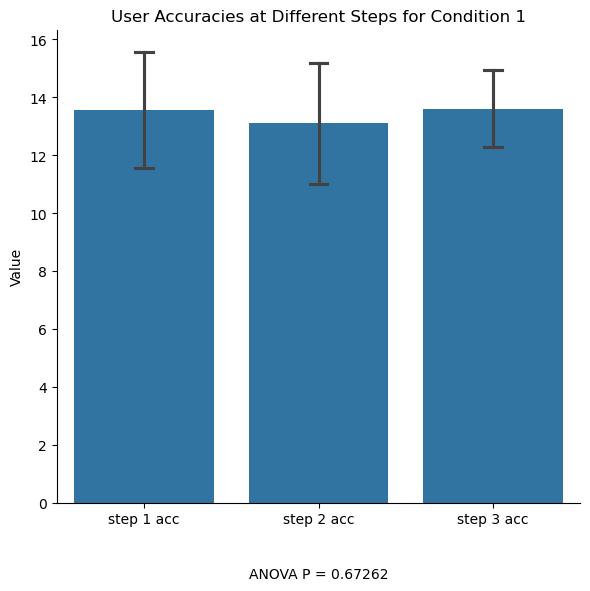

In [4]:
# User Accuracies at Different Steps
filtered_df = df[df['condition'] == CONDITION]


user_acc = {
    "step 1 acc": [],
    "step 2 acc": [],
    "step 3 acc": [],
}

for index, row in filtered_df.iterrows():
    s1,s2,s3 = 0,0,0
    for i in range(1, 21):
        if row[f"{i}_gt"] == row[f"{i}_1"]: s1 += 1
        if row[f"{i}_gt"] == row[f"{i}_2"]: s2 += 1
        if row[f"{i}_gt"] == row[f"{i}_3"]: s3 += 1
    user_acc["step 1 acc"].append(s1)
    user_acc["step 2 acc"].append(s2)
    user_acc["step 3 acc"].append(s3)

print(user_acc)
print(f"Acc. grater than 75%: {sum(1 for acc in user_acc['step 3 acc'] if acc >= 0.75 * 20)}")
print(f"Acc. less than 50%: {sum(1 for acc in user_acc['step 3 acc'] if acc <= 0.5 * 20)}")
user_acc = pd.DataFrame(user_acc)
plot_bar(user_acc, title=f"User Accuracies at Different Steps for Condition {CONDITION}")

{'acc s2 - s1': [0.0, 5.0, -5.0, 0.0, 0.0, -15.0, -5.0, -5.0, -5.0, 0.0, 0.0, 0.0, 9.999999999999993, -9.999999999999993, -5.0, 0.0, -5.000000000000007, 0.0], 'acc s3 - s2': [0.0, 0.0, 15.0, 0.0, -5.0, 10.0, 5.0, -5.0, 0.0, 10.0, -15.0, 10.0, 5.0, 9.999999999999993, 5.0, -5.0, 0.0, 5.0], 'acc s3 - s1': [0.0, 5.0, 10.0, 0.0, -5.0, -5.0, 0.0, -10.0, -5.0, 10.0, -15.0, 10.0, 14.999999999999993, 0.0, 0.0, -5.0, -5.000000000000007, 5.0]}
One-way ANOVA results:
F-statistic: 2.093643586833145
p-value: 0.13370381986747162


/Users/Luo/Lab/projects/trust-data-analysis/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
acc s2 - s1 acc s3 - s1      2.5  0.529  -3.074   8.074  False
acc s2 - s1 acc s3 - s2   4.7222 0.1118 -0.8517 10.2962  False
acc s3 - s1 acc s3 - s2   2.2222 0.6037 -3.3517  7.7962  False
--------------------------------------------------------------


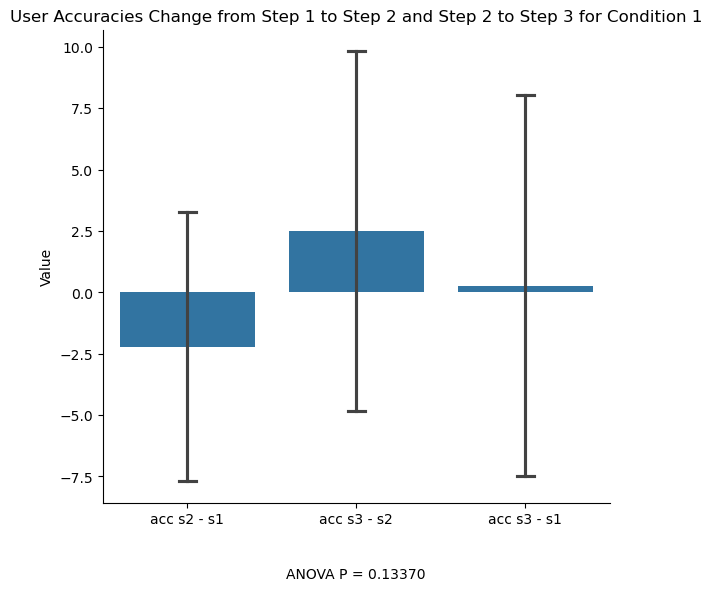

In [5]:
# user acc change (in percentage) from s1 - s2 and s2 - s3

filtered_df = df[df['condition'] == CONDITION]

data = {
    "acc s2 - s1": [],
    "acc s3 - s2": [],
    "acc s3 - s1": [],
}

for index, row in filtered_df.iterrows():
    s1,s2,s3 = 0,0,0
    for i in range(1, 21):
        if row[f"{i}_gt"] == row[f"{i}_1"]: s1 += 1
        if row[f"{i}_gt"] == row[f"{i}_2"]: s2 += 1
        if row[f"{i}_gt"] == row[f"{i}_3"]: s3 += 1
    data["acc s2 - s1"].append((s2/20)*100-(s1/20)*100)
    data["acc s3 - s2"].append((s3/20)*100-(s2/20)*100)
    data["acc s3 - s1"].append((s3/20)*100-(s1/20)*100)

print(data)
data = pd.DataFrame(data)
plot_bar(data, title=f"User Accuracies Change from Step 1 to Step 2 and Step 2 to Step 3 for Condition {CONDITION}")

{'step 1-2 change': [2, 1, 1, 0, 4, 3, 1, 3, 7, 0, 0, 4, 4, 4, 1, 0, 1, 0], 'step 2-3 change': [2, 0, 5, 4, 1, 2, 1, 5, 0, 6, 3, 2, 1, 2, 1, 1, 0, 3]}
One-way ANOVA results:
F-statistic: 0.06827309236947796
p-value: 0.795444268771526


/Users/Luo/Lab/projects/trust-data-analysis/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
step 1-2 change step 2-3 change   0.1667 0.7954 -1.1296 1.4629  False
---------------------------------------------------------------------


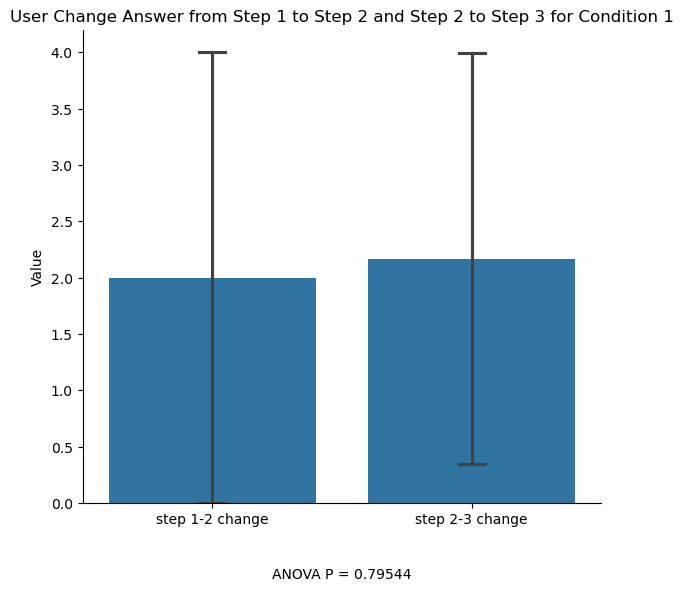

In [6]:
# User change answer from step 1-2 and step 2-3

filtered_df = df[df['condition'] == CONDITION]

data = {
    "step 1-2 change": [],
    "step 2-3 change": []
}

for index, row in filtered_df.iterrows():
    s12,s23 = 0,0
    for i in range(1, 21):
        if row[f'{i}_1'] != row[f'{i}_2']: s12 += 1
        if row[f'{i}_2'] != row[f'{i}_3']: s23 += 1
    data["step 1-2 change"].append(s12)
    data["step 2-3 change"].append(s23)

print(data)
data = pd.DataFrame(data)
plot_bar(data, title=f"User Change Answer from Step 1 to Step 2 and Step 2 to Step 3 for Condition {CONDITION}")

{'step 1 follow': [15, 16, 13, 15, 14, 15, 13, 13, 13, 10, 15, 14, 15, 13, 14, 16, 13, 17], 'step 2 follow': [17, 17, 14, 15, 18, 18, 14, 16, 20, 10, 15, 16, 19, 17, 15, 16, 14, 17], 'step 3 follow': [19, 17, 17, 17, 19, 18, 15, 17, 20, 14, 18, 18, 20, 19, 16, 15, 14, 18]}
One-way ANOVA results:
F-statistic: 12.173875181422355
p-value: 4.761536190362848e-05


/Users/Luo/Lab/projects/trust-data-analysis/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.





Tukey's HSD test results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower  upper  reject
----------------------------------------------------------------
step 1 follow step 2 follow   1.8889  0.014 0.3301 3.4477   True
step 1 follow step 3 follow   3.1667    0.0 1.6079 4.7254   True
step 2 follow step 3 follow   1.2778 0.1278 -0.281 2.8366  False
----------------------------------------------------------------


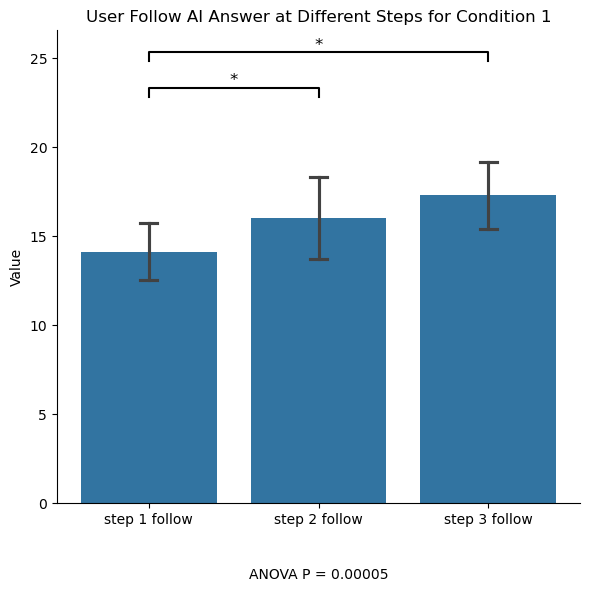

In [7]:
# user follow AI ans

filtered_df = df[df['condition'] == CONDITION]

data = {
    "step 1 follow": [],
    "step 2 follow": [],
    "step 3 follow": []
}

for index, row in filtered_df.iterrows():
    s1,s2,s3 = 0,0,0
    for i in range(1, 21):
        if row[f"{i}_ai"] == row[f"{i}_1"]: s1 += 1
        if row[f"{i}_ai"] == row[f"{i}_2"]: s2 += 1
        if row[f"{i}_ai"] == row[f"{i}_3"]: s3 += 1
    data["step 1 follow"].append(s1)
    data["step 2 follow"].append(s2)
    data["step 3 follow"].append(s3)

print(data)
data = pd.DataFrame(data)
plot_bar(data, title=f"User Follow AI Answer at Different Steps for Condition {CONDITION}")

Wilcoxon signed-rank test results:
pre_satisfaction vs post_satisfaction: statistic = 9.0, p-value = 0.049558383092979504


/Users/Luo/Lab/projects/trust-data-analysis/utils.py:359: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/Users/Luo/anaconda3/envs/ml-general/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



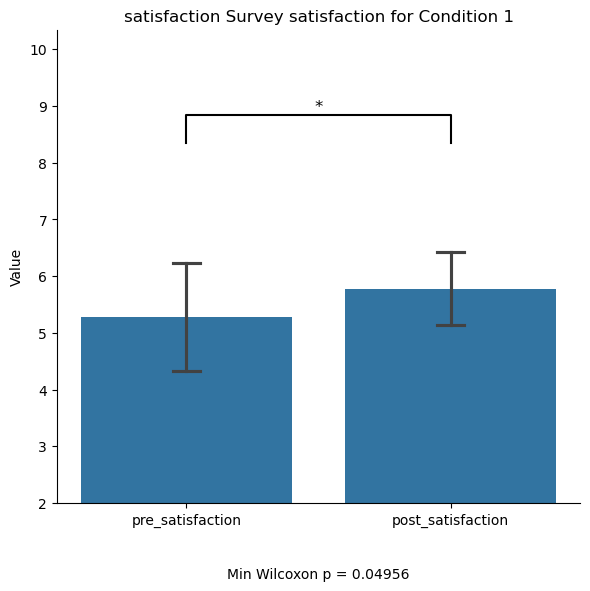

Wilcoxon signed-rank test results:
pre_complexity vs post_complexity: statistic = 28.0, p-value = 0.3738433266021559


/Users/Luo/Lab/projects/trust-data-analysis/utils.py:359: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/Users/Luo/anaconda3/envs/ml-general/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



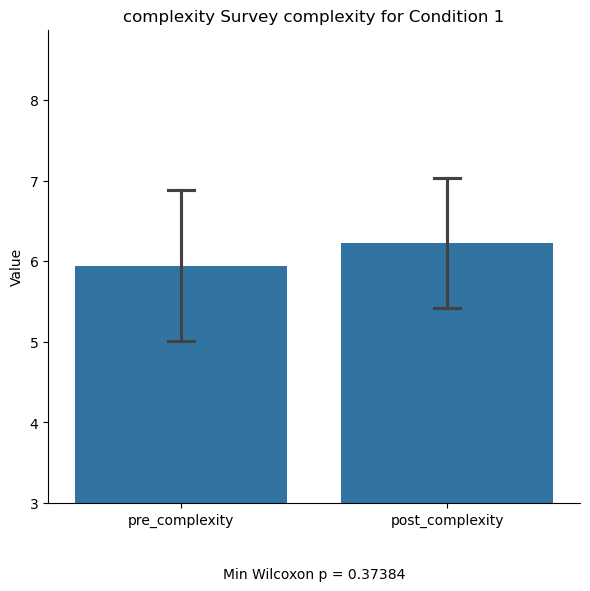

/Users/Luo/Lab/projects/trust-data-analysis/utils.py:359: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/Users/Luo/anaconda3/envs/ml-general/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



Wilcoxon signed-rank test results:
pre_reliability vs post_reliability: statistic = 5.0, p-value = 0.0050430226038068


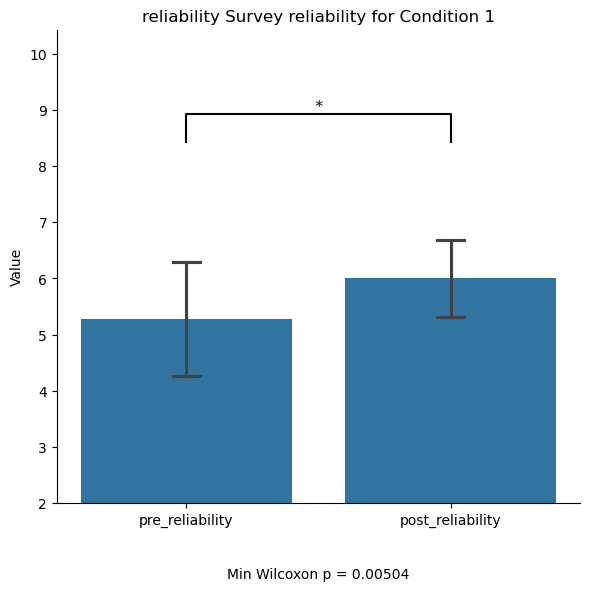

Wilcoxon signed-rank test results:
pre_trust vs post_trust: statistic = 40.0, p-value = 0.42046560014359935


/Users/Luo/Lab/projects/trust-data-analysis/utils.py:359: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/Users/Luo/anaconda3/envs/ml-general/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



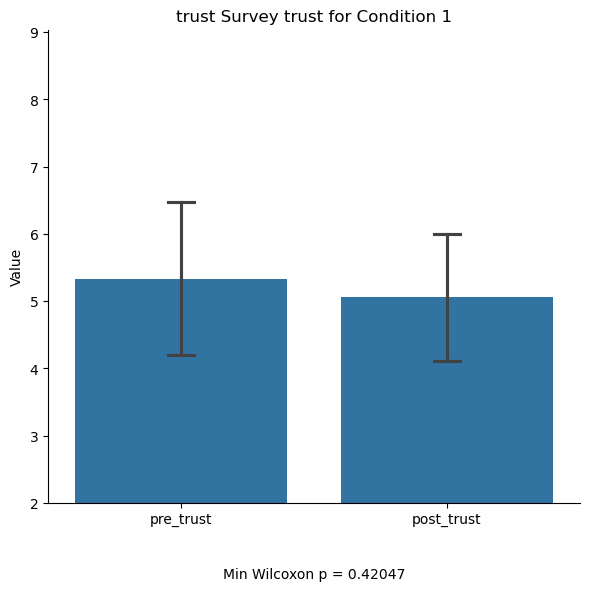

/Users/Luo/Lab/projects/trust-data-analysis/utils.py:359: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/Users/Luo/anaconda3/envs/ml-general/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



Wilcoxon signed-rank test results:
pre_accurate vs post_accurate: statistic = 28.0, p-value = 0.16551785869747015


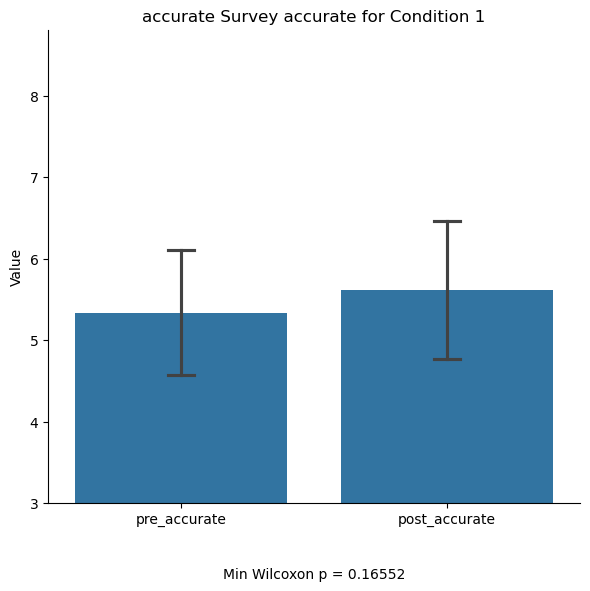

In [8]:
# Survey

survey = ['satisfaction', 'complexity', 'reliability', 'trust', 'accurate']

for s in survey:
    data = {
        f"pre_{s}": [],
        f"post_{s}": []
    }

    for index, row in filtered_df.iterrows():
        data[f"pre_{s}"].append(row[f"pre_{s}"])
        data[f"post_{s}"].append(row[f"post_{s}"])
    data = pd.DataFrame(data)
    plot_bar_wilcoxon(data, title=f"{s} Survey {s} for Condition {CONDITION}")

In [ ]:
# user acc across steps

data = {
    'ai_correct': [],
    's1_correct': [],
    's2_correct': [],
    's3_correct': []
}

for index, row in filtered_df.iterrows():
    ai,s1,s2,s3 = 0,0,0,0
    for i in range(1, 21):
        if row[f"{i}_ai"] == row[f"{i}_gt"]: 
            data['ai_correct'].append(True)
        else:
            data['ai_correct'].append(False)
        if row[f"{i}_1"] == row[f"{i}_gt"]: 
            data['s1_correct'].append(True)
        else:
            data['s1_correct'].append(False)
        if row[f"{i}_2"] == row[f"{i}_gt"]: 
            data['s2_correct'].append(True)
        else:
            data['s2_correct'].append(False)
        if row[f"{i}_3"] == row[f"{i}_gt"]: 
            data['s3_correct'].append(True)
        else:
            data['s3_correct'].append(False)
data = pd.DataFrame(data)

plot_parallel(data, True)
plot_parallel(data, False)

/Users/Luo/Lab/projects/trust-data-analysis/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




{'s2 acc given s1 wrong': [1, 1, 0, 0, 2, 0, 0, 1, 3, 0, 0, 2, 3, 1, 0, 0, 0, 0], 's3 acc given s1 wrong': [2, 1, 3, 2, 2, 1, 1, 2, 3, 4, 0, 3, 4, 3, 1, 0, 0, 2]}
One-way ANOVA results:
F-statistic: 8.056872037914694
p-value: 0.007593753132311542

Tukey's HSD test results:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2        meandiff p-adj  lower  upper  reject
--------------------------------------------------------------------------------
s2 acc given s1 wrong s3 acc given s1 wrong   1.1111 0.0076 0.3156 1.9066   True
--------------------------------------------------------------------------------


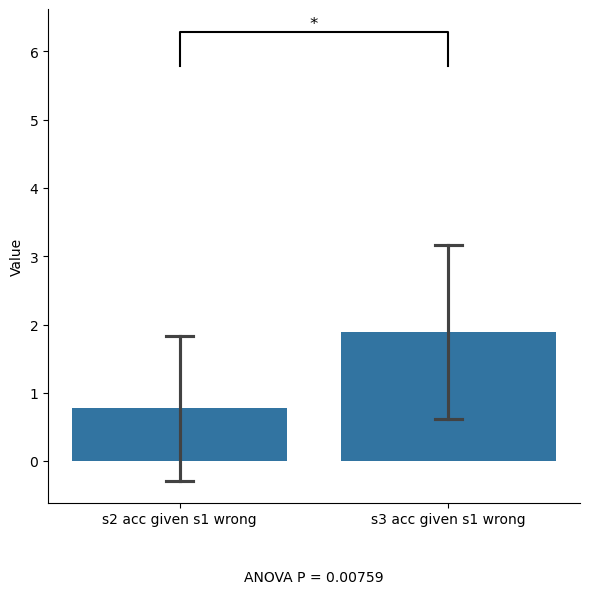

In [10]:
# Step 3 correct when step 1 or step 2 were wrong
filtered_df = df[df['condition'] == CONDITION]

data = {
    "s2 acc given s1 wrong": [],
    "s3 acc given s1 wrong": []
}

for index, row in filtered_df.iterrows():
    s2 = 0
    s3 = 0
    total = 0
    for i in range(1, 21):
        # given s1 was wrong, acc for s2 and s3
        if (row[f"{i}_1"] != row[f"{i}_gt"]):
            total += 1
            if row[f"{i}_2"] == row[f"{i}_gt"]:
                s2 += 1
            if row[f"{i}_3"] == row[f"{i}_gt"]:
                s3 += 1
    data["s2 acc given s1 wrong"].append(s2)
    data["s3 acc given s1 wrong"].append(s3)

print(data)
data = pd.DataFrame(data)
plot_bar(data)

{'s2 acc given s1 wrong': [20.0, 16.666666666666664, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 20.0, 60.0, 0.0, 0.0, 25.0, 33.33333333333333, 14.285714285714285, 0.0, 0.0, 0.0, 0.0], 's3 acc given s2 wrong': [20.0, 0.0, 50.0, 28.57142857142857, 0.0, 25.0, 12.5, 33.33333333333333, 0.0, 40.0, 0.0, 25.0, 14.285714285714285, 22.22222222222222, 14.285714285714285, 0.0, 0.0, 28.57142857142857]}
One-way ANOVA results:
F-statistic: 0.8662679112788352
p-value: 0.3585524912537753

Tukey's HSD test results:
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
s2 acc given s1 wrong s3 acc given s2 wrong   5.0639 0.3586 -5.9931 16.1209  False
----------------------------------------------------------------------------------


/Users/Luo/Lab/projects/trust-data-analysis/utils.py:316: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




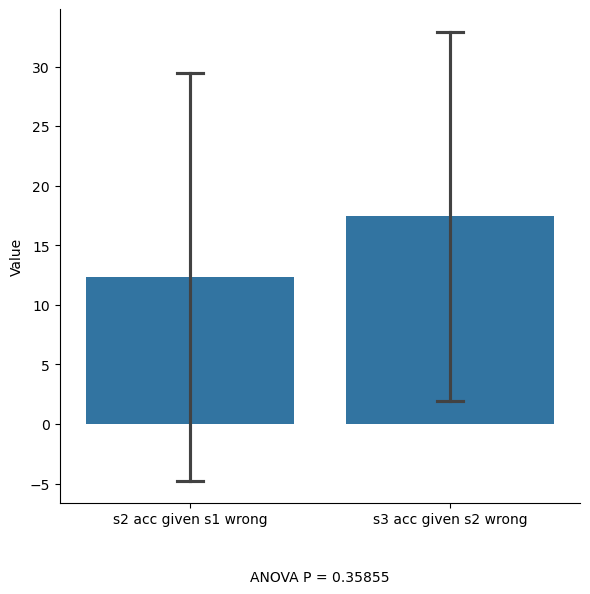

In [11]:
# step x correct when step x-1 was wrong
filtered_df = df[df['condition'] == CONDITION]

data = {
    "s2 acc given s1 wrong": [],
    "s3 acc given s2 wrong": []
}

for index, row in filtered_df.iterrows():
    s2 = 0
    s3 = 0
    s2_total = 0
    s3_total = 0
    for i in range(1, 21):
        # given s1 was wrong, acc for s2 and s3
        if (row[f"{i}_1"] != row[f"{i}_gt"]):
            s2_total += 1
            if row[f"{i}_2"] == row[f"{i}_gt"]:
                s2 += 1
        if (row[f"{i}_2"] != row[f"{i}_gt"]):
            s3_total += 1
            if row[f"{i}_3"] == row[f"{i}_gt"]:
                s3 += 1
    data["s2 acc given s1 wrong"].append((s2 / s2_total) * 100)
    data["s3 acc given s2 wrong"].append((s3 / s3_total) * 100)

print(data)
data = pd.DataFrame(data)
plot_bar(data)

# Repeated measures ANOVA

In [12]:
c = 0

for c in range(1, 7):
    print(f"Condition {c}")
    df = load_data()
    filtered_df = df[df['condition'] == c]

    data = {
        'subject': [],
        'step': [],
        'acc': []
    }

    count = 0
    for index, row in filtered_df.iterrows():
        count += 1
        s1=0
        s2=0
        s3=0
        for i in range(1, 21):
            if row[f"{i}_gt"] == row[f"{i}_1"]: s1 += 1
            if row[f"{i}_gt"] == row[f"{i}_2"]: s2 += 1
            if row[f"{i}_gt"] == row[f"{i}_3"]: s3 += 1
        data["subject"] += [count, count, count]
        data["step"] += ['s1', 's2', 's3']
        data["acc"] += [s1, s2, s3]

    print(data)
    data = pd.DataFrame(data)
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import AnovaRM
    anova_results = AnovaRM(data, 'acc', 'subject', within=['step']).fit()
    print(anova_results)

Condition 1
{'subject': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18], 'step': ['s1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3', 's1', 's2', 's3'], 'acc': [15, 15, 15, 14, 15, 15, 13, 12, 15, 13, 13, 13, 14, 14, 13, 15, 12, 14, 13, 12, 13, 15, 14, 13, 15, 14, 14, 10, 10, 12, 19, 19, 16, 12, 12, 14, 11, 13, 14, 13, 11, 13, 14, 13, 14, 14, 14, 13, 11, 10, 10, 13, 13, 14]}
              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
step  1.4086 2.0000 34.0000 0.2584

Condition 2
{'subject': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 

In [13]:
c = 0

for c in range(1, 7):
    print(f"Condition {c}")
    df = load_data()
    filtered_df = df[df['condition'] == c]

    data = {
        'subject': [],
        'step': [],
        'follow': []
    }

    count = 0
    for index, row in filtered_df.iterrows():
        count += 1
        s1=0
        s2=0
        s3=0
        for i in range(1, 21):
            if row[f"{i}_ai"] == row[f"{i}_2"]: s2 += 1
            if row[f"{i}_ai"] == row[f"{i}_3"]: s3 += 1
        data["subject"] += [count, count]
        data["step"] += ['s2', 's3']
        data["follow"] += [s2, s3]

    print(data)
    data = pd.DataFrame(data)
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import AnovaRM
    anova_results = AnovaRM(data, 'follow', 'subject', within=['step']).fit()
    print(anova_results)

Condition 1
{'subject': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18], 'step': ['s2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3'], 'follow': [17, 19, 17, 17, 14, 17, 15, 17, 18, 19, 18, 18, 14, 15, 16, 17, 20, 20, 10, 14, 15, 18, 16, 18, 19, 20, 17, 19, 15, 16, 16, 15, 14, 14, 17, 18]}
              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
step 18.0946 1.0000 17.0000 0.0005

Condition 2
{'subject': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18], 'step': ['s2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3', 's2', 's3',